# Social Media : PREDICT NO.OF SHARES OF AN ARTICLE

Dataset consists of around 40,000 articles.
Target here is to do analysis and modeling to predict number of shares of an article given the input parameters.

In [1]:
# importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from scipy.stats import zscore
import numpy as np

In [2]:
# reading the csv data
data = pd.read_csv('OnlineNewsPopularity.csv')

# dropping the url column since it has no significance as a model feature
data.drop(['url'],axis=1,inplace=True)

In [3]:
# studying the data

data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


There are 60 columns. 'shares' column is a target (dependable) variable and it is of continous nature. So we have 59 features

Since dependable variable is a continous lets try the Regression model

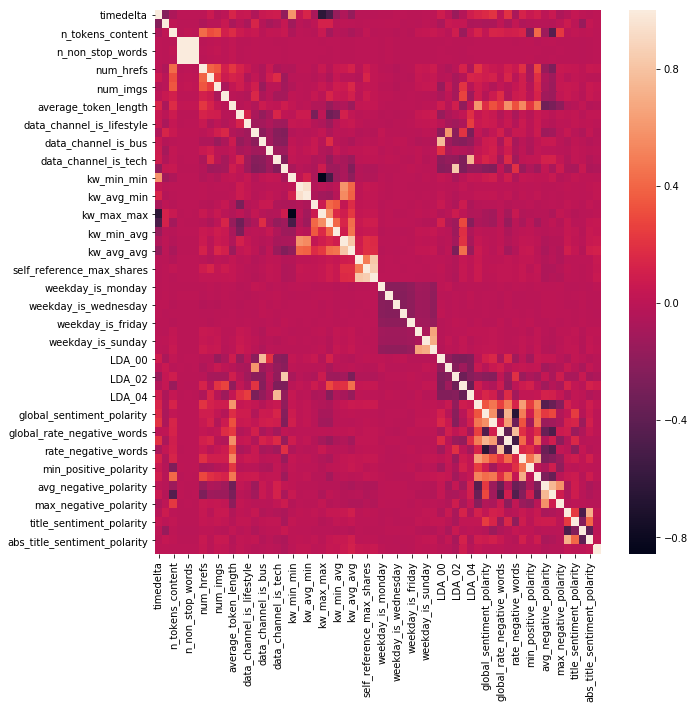

In [5]:
# A heat map of correlation between all the features

fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr())

As observing in the correlation heat map, there are not many light and dark squares.

Which indicates that not many features are correlated among all the 59 features.

So lets try to build a simple regression model without doing and EDA.

In [6]:
X = data.drop(['shares'],axis=1)
y = data['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

reg = LinearRegression()
reg.fit(X_train,y_train)
s1 = reg.score(X_train,y_train)
s2 = reg.score(X_test,y_test)
print('R2 score on training data is',s1)
print('R2 score on test data is',s2)

R2 score on training data is 0.025751322071249968
R2 score on test data is -0.29445068582991607


As we see the r2 square for both training and test data is very poor.

Lets find the reason for it and try to improve it.

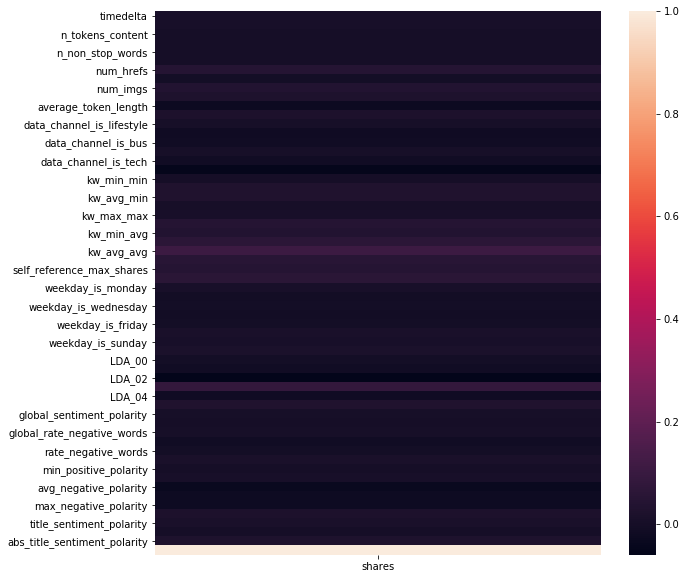

In [7]:
# A heat map of correlation between features and target variable ('shares')

fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr()[['shares']])

From above heat map of the correlation of 'shares' column with all the other features, we can observe that none of the features is correlated more than a value of 0.4, which a low correlation.

Since target variable is very low corelated to features, the regression model is not performing well.

Lets use PCA and to reduce the number of features and then try to use that data

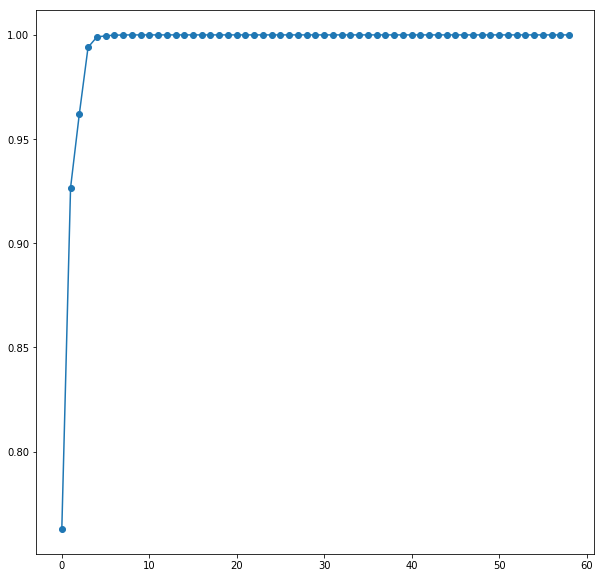

In [8]:
pca = PCA()
pca.fit(data.drop(['shares'],axis=1))
plt.figure(figsize=(10,10))
plt.plot(pca.explained_variance_ratio_.cumsum(),marker='o')

So more than 90% variance in data is covered by just two components. So lets use only two principle components.

In [9]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.drop(['shares'],axis=1))
data_pca = pd.DataFrame(data_pca,columns = ['axis1','axis2'])
data_pca = data_pca.join(data['shares'])

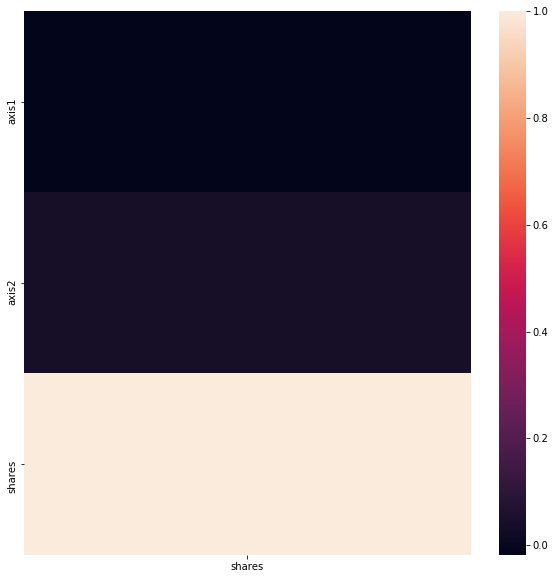

In [10]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data_pca.corr()[['shares']])

From the above heat map of correlation of new components with target('shares') variable, we can say that still correlation is very low.

In [11]:
X = data_pca.drop(['shares'],axis=1)
y = data_pca['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

reg = LinearRegression()
reg.fit(X_train,y_train)
s1 = reg.score(X_train,y_train)
s2 = reg.score(X_test,y_test)
print('R2 score on training data with PCA is',s1)
print('R2 score on test with PCA is',s2)

R2 score on training data with PCA is 0.0025566144082160847
R2 score on test with PCA is 0.0016014723457203894


So far any model is not even slight good to be used since R2 score value is very low.

The reason for this can be that data is not good enough to be used for any ML kind model, not even for Neural Networks.

So all that can be done is to improve the quality of data.

Lets try removing some outliers

In [12]:
#Removing Outliers

z_scores = zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_filt = data[filtered_entries]

X = data_filt.drop(['shares'],axis=1)
y = data_filt['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

reg = LinearRegression()
reg.fit(X_train,y_train)
s1 = reg.score(X_train,y_train)
s2 = reg.score(X_test,y_test)
print('R2 score on training data after removing outliers is',s1)
print('R2 score on test data after removing outliers with PCA is',s2)

R2 score on training data after removing outliers is 0.09072859479169493
R2 score on test data after removing outliers with PCA is 0.06463731333249534


So there is atleast some increament in the r2 score, but not a significant one.

Since data is very poor, it will require a lot of data manupulation.